<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%ED%95%A9%EB%B6%88%EC%9E%90%EB%A3%8C%EC%A0%95%EB%A6%ACB_%EC%9D%80%ED%8F%89%EA%B3%A02024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#pandas, openpyxl 라이브러리 부르기
import pandas as pd
import numpy as np
import os
import openpyxl
from tabulate import tabulate
import matplotlib.pyplot as plt


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


# 첫 5줄을 봅니다.
df.tail(4)

In [2]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
#내신과 수능과 상관관계A: 산포도


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



# Drop rows with any NaN values in '전과목' or '등급수능' columns
df = df.dropna(subset=['전과목', '등급수능'])


# Extract '전과목' and '등급수능' columns
x = df['전과목'].values
y = df['등급수능'].values


# Calculate the correlation coefficient
corr_coef = np.corrcoef(x, y)[0, 1]


# Create the scatter plot
plt.scatter(x, y, alpha=0.5,  c='black')
plt.title('2024학년도 E고 내신과 수능')
plt.xlabel('내신')
plt.ylabel('수능')

# Add the correlation coefficient to the plot
plt.text(0.3, 0.9, f'상관관계(r) = {corr_coef:.2f}',
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=15)

# Reverse the x-axis and y-axis
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()


#그래프 저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_내신수능상관계수.png')
plt.savefig(f'{path}pass_2024_은평고_내신수능상관계수.pdf')

plt.show()

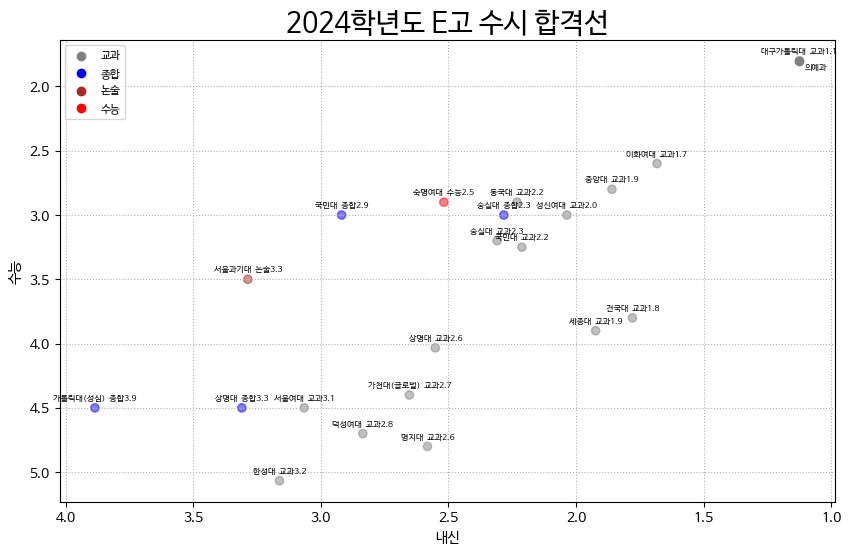

In [168]:
import matplotlib.pyplot as plt
import pandas as pd

##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')

#대학 리스트
uni = ['대구가톨릭대', '중앙대', '이화여대', '건국대', '동국대', '숙명여대', '국민대', '숭실대', '세종대', '서울과기대',
       '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)', '한성대', '삼육대', '성신여대', '서울여대', '덕성여대']

# 4가지 조건: 상위권대, 내신 4등급이상, 수능등급 4등급이상(결측치 학생포함), 합격자
df_filtered = df[ (df['대학'].isin(uni)) & (df['전과목'] <= 4.0) & (df['등급수능'].isna() <= 4.0) & (df['최종'] == '합')]

#실기전형 제외
df_filtered = df_filtered[df_filtered['전형분류'] != '실기']

# Determine groups with unique and multiple occurrences
group_sizes = df_filtered.groupby(['대학', '전형분류']).size()

# Separate groups based on occurrence
single_occurrences = group_sizes[group_sizes == 1].index
multiple_occurrences = group_sizes[group_sizes > 1].index

# Filter rows for single and multiple occurrences
df_single = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(single_occurrences)]
df_multiple = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(multiple_occurrences)]

# Calculate means for multiple occurrences
df_multiple_mean = df_multiple.groupby(['대학', '전형분류']).agg({'전과목': 'mean', '등급수능': 'mean'}).reset_index()

# Combine single and multiple occurrence DataFrames
df_combined = pd.concat([df_single, df_multiple_mean])

# Extract relevant columns for plotting
x = df_combined['전과목'].values
y = df_combined['등급수능'].values
universities = df_combined['대학'].values
admission_types = df_combined['전형분류'].values
subjects_scores = df_combined['전과목'].values  # Extract '전과목' values for annotation

# 조건에 따라 색상 설정
df_combined['color'] = 'gray'
df_combined.loc[df_combined['전형분류'] == '종합', 'color'] = 'blue'
df_combined.loc[df_combined['전형분류'] == '수능', 'color'] = 'red'
df_combined.loc[df_combined['전형분류'] == '논술', 'color'] = 'brown'

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot points with respective colors
plt.scatter(x, y, alpha=0.5, c=df_combined['color'])

# Add labels for each point including '전과목' value
for i, txt in enumerate(universities):
    annotation_text = f"{txt}  {admission_types[i]}{subjects_scores[i]:.1f}"  # Include '전과목' value in annotation
    plt.annotate(annotation_text, (x[i], y[i]+0.05), textcoords="offset points", xytext=(0,10), ha='center', fontsize= 6)

# Add points for ('모집단위' == '의예과') & ('최종' == '합')
x_special = df_filtered.loc[(df_filtered['모집단위'] == '의예과') & (df_filtered['최종'] == '합'), '전과목']
y_special = df_filtered.loc[(df_filtered['모집단위'] == '의예과') & (df_filtered['최종'] == '합'), '등급수능']
plt.scatter(x_special, y_special, c='gray')

# Add '의예과' text to the special points
for i in range(len(x_special)):
    plt.text(x_special.iloc[i]-0.02, y_special.iloc[i]+0.07, '의예과', fontsize=6)

plt.title('2024학년도 E고 수시 합격선', fontsize=20)
plt.xlabel('내신')
plt.ylabel('수능')

# Reverse x-axis and y-axis for original plot orientation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Add dashed grid lines for readability
plt.grid(True, linestyle=':')

# Create legend for admission types
plt.scatter([], [], color='gray', label='교과')
plt.scatter([], [], color='blue', label='종합')
plt.scatter([], [], color='brown', label='논술')
plt.scatter([], [], color='red', label='수능')


# Show legend
plt.legend(loc='upper left', fontsize=8)
#plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', fontsize=8)


#저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_수시합격선.png')
plt.savefig(f'{path}pass_2024_은평고_수시합격선.pdf')

# Show plot
plt.show()

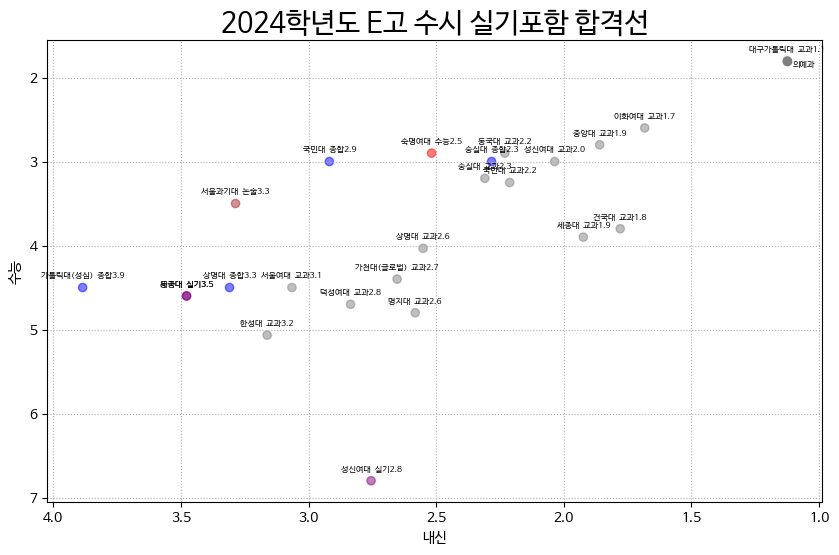

In [169]:
#수시결과를 요약B: 실기까지 포함

import matplotlib.pyplot as plt
import pandas as pd


##  데이터 부르기
path = '/content/drive/MyDrive/python/habbul/'
df = pd.read_excel(f'{path}eunpyeong_2024_habbul.xlsx')


#대학 리스트
uni = ['대구가톨릭대', '중앙대', '이화여대', '건국대', '동국대', '숙명여대', '국민대', '숭실대', '세종대', '서울과기대',
       '명지대', '상명대', '가천대(글로벌)', '가톨릭대(성심)', '한성대', '삼육대', '성신여대', '서울여대', '덕성여대']


# 4가지 조건: 상위권대, 내신 4등급이상, 수능등급 4등급이상(결측치 학생포함), 합격자
df_filtered = df[ (df['대학'].isin(uni)) & (df['전과목'] <= 4.0) & (df['등급수능'].isna() <= 4.0) & (df['최종'] == '합')]


#실기전형 제외
#df_filtered = df_filtered[df_filtered['전형분류'] != '실기']


# Determine groups with unique and multiple occurrences
group_sizes = df_filtered.groupby(['대학', '전형분류']).size()

# Separate groups based on occurrence
single_occurrences = group_sizes[group_sizes == 1].index
multiple_occurrences = group_sizes[group_sizes > 1].index

# Filter rows for single and multiple occurrences
df_single = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(single_occurrences)]
df_multiple = df_filtered[df_filtered.set_index(['대학', '전형분류']).index.isin(multiple_occurrences)]

# Calculate means for multiple occurrences
df_multiple_mean = df_multiple.groupby(['대학', '전형분류']).agg({'전과목': 'mean', '등급수능': 'mean'}).reset_index()

# Combine single and multiple occurrence DataFrames
df_combined = pd.concat([df_single, df_multiple_mean])
# This part remains the same as in the previous snippet...

# Extract relevant columns for plotting
x = df_combined['전과목'].values
y = df_combined['등급수능'].values
universities = df_combined['대학'].values
admission_types = df_combined['전형분류'].values
subjects_scores = df_combined['전과목'].values  # Extract '전과목' values for annotation


# 조건에 따라 색상 설정
df_combined['color'] = 'gray'
df_combined.loc[df_combined['전형분류'] == '종합', 'color'] = 'blue'
df_combined.loc[df_combined['전형분류'] == '수능', 'color'] = 'red'
df_combined.loc[df_combined['전형분류'] == '논술', 'color'] = 'brown'
df_combined.loc[df_combined['전형분류'] == '실기', 'color'] = 'purple'



# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot points with respective colors
plt.scatter(x, y, alpha=0.5, c=df_combined['color'])

# Add labels for each point including '전과목' value
for i, txt in enumerate(universities):
    annotation_text = f"{txt}  {admission_types[i]}{subjects_scores[i]:.1f}"  # Include '전과목' value in annotation
    plt.annotate(annotation_text, (x[i], y[i]+0.05), textcoords="offset points", xytext=(0,10), ha='center', fontsize= 6)



# Add points for ('모집단위' == '의예과') & ('최종' == '합')
x_special = df_filtered.loc[(df_filtered['모집단위'] == '의예과') & (df_filtered['최종'] == '합'), '전과목']
y_special = df_filtered.loc[(df_filtered['모집단위'] == '의예과') & (df_filtered['최종'] == '합'), '등급수능']
#plt.scatter(x_special, y_special, alpha=0.5, c='gray')
plt.scatter(x_special, y_special, c='gray')


# Add '의예과' text to the special points
for i in range(len(x_special)):
    plt.text(x_special.iloc[i]-0.02, y_special.iloc[i]+0.07, '의예과', fontsize=6)



plt.title('2024학년도 E고 수시 실기포함 합격선', fontsize=20)
plt.xlabel('내신')
plt.ylabel('수능')

# Reverse x-axis and y-axis for original plot orientation
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Add dashed grid lines for readability
plt.grid(True, linestyle=':')


#저장
path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_수시합격선_실기포함.png')
plt.savefig(f'{path}pass_2024_은평고_수시합격선_실기포함.pdf')

# Show plot
plt.show()

In [ ]:
#내신과 수능과 상관관계B: 히트맵


import seaborn as sns

#일부 항목추출
df_heatmap = df[['전과목', '국어_등급', '수학_등급', '영어_등급', '선택1_등급', '선택2_등급', '표점합수능',  '백분위수능',  '등급수능']]


# 상관계수 계산
corr = df_heatmap.corr()


# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('2024학년도 E고 내신과 수능의 상관계수(히트맵)')

path = '/content/drive/MyDrive/python/eunpyeong/result_habbul/'
plt.savefig(f'{path}pass_2024_은평고_히트맵상관계수.png')
plt.savefig(f'{path}pass_2024_은평고_히트맵상관계수.pdf')

plt.show()

In [ ]:
uni = ['가톨릭대(성심)', '상명대']

df_jeonghab = df[(df['대학'].isin(uni)) & (df['전형분류'] == '종합') & (df['최종'] == '합')]
df_jeonghab = df_jeonghab[['이름', '대학', '모집단위', '최종', '전과목', '등급수능', '전형분류']]
print(df_jeonghab)